# Taylor appproximation

-3205.3355052185057 482009.70322290756


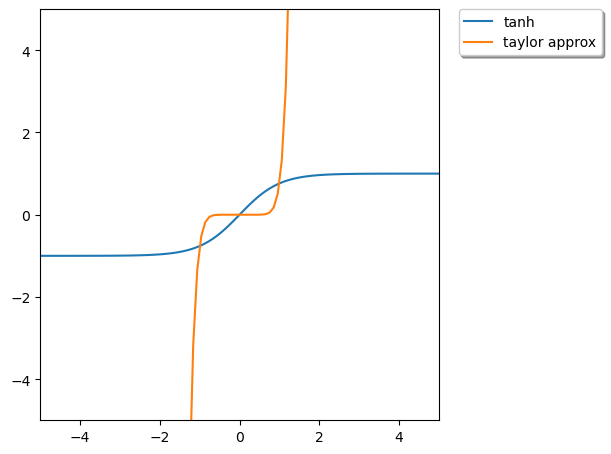

In [4]:
import logging

import numpy

import cicada
from cicada.additive import AdditiveProtocolSuite
from cicada.communicator import SocketCommunicator

from statistics import mean, stdev
from tqdm import *

logging.basicConfig(level=logging.INFO)


import matplotlib.pyplot as plt

func2try = numpy.tanh
def main(communicator):
    log = cicada.Logger(logging.getLogger(), communicator)
    protocol = AdditiveProtocolSuite(communicator)

    err_list = []
    
    axis = numpy.linspace(-5, 5, num=100)
    plt.plot(axis, func2try(axis), label="tanh")
    
    logging.basicConfig(level=logging.INFO)
    pade_evals=[]
    for x in axis:
        pade_evals.append(protocol.reveal(protocol.taylor_approx(func2try, protocol.share(src=0, secret=numpy.array(x), shape=()), degree=10)))
        legit = func2try(x)
        err_list.append(legit-pade_evals[-1])
        #if communicator.rank ==1:
        #    print(legit_tanh, cic_pade_tanh, legit_tanh-cic_pade_tanh)
    

    
    if communicator.rank ==1:
        print(mean(err_list), stdev(err_list))
                    
    plt.plot(axis, pade_evals, label='taylor approx' )
                               
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
               borderaxespad=0.0, shadow=True)
    plt.tight_layout()
    plt.axis([-5, 5, -5, 5])
    if communicator.rank == 1:
        plt.show()



SocketCommunicator.run(world_size=3, fn=main);

-869685.3030845642 1919644.433899588


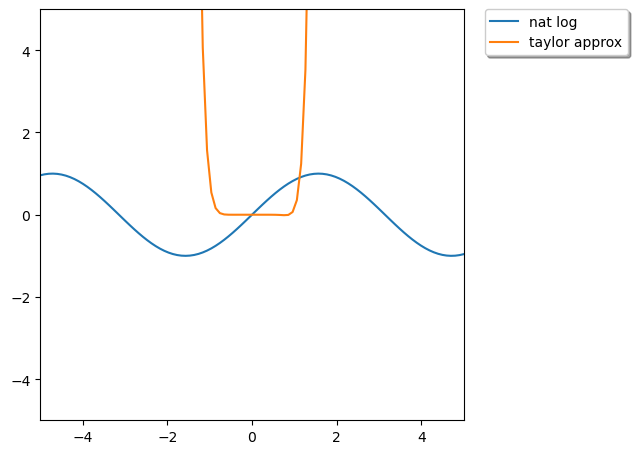

In [11]:
import logging

import numpy

import cicada
from cicada.additive import AdditiveProtocolSuite
from cicada.communicator import SocketCommunicator

from statistics import mean, stdev
from tqdm import *

logging.basicConfig(level=logging.INFO)

bottom=-5
top=5

import matplotlib.pyplot as plt

func2try = numpy.sin
def main(communicator):
    log = cicada.Logger(logging.getLogger(), communicator)
    protocol = AdditiveProtocolSuite(communicator)

    err_list = []
    
    axis = numpy.linspace(bottom, top, num=100)
    plt.plot(axis, func2try(axis), label="sin")
    
    logging.basicConfig(level=logging.INFO)
    pade_evals=[]
    for x in axis:
        pade_evals.append(protocol.reveal(protocol.taylor_approx(func2try, protocol.share(src=0, secret=numpy.array(x), shape=()), scale=3, degree=12)))
        legit = func2try(x)
        err_list.append(legit-pade_evals[-1])
        #if communicator.rank ==1:
        #    print(legit_tanh, cic_pade_tanh, legit_tanh-cic_pade_tanh)
    

    
    if communicator.rank ==1:
        print(mean(err_list), stdev(err_list))
                    
    plt.plot(axis, pade_evals, label='taylor approx' )
                               
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
               borderaxespad=0.0, shadow=True)
    plt.tight_layout()
    plt.axis([bottom, top, bottom, top])
    if communicator.rank == 1:
        plt.show()



SocketCommunicator.run(world_size=3, fn=main);